In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load the dataset
data_path = '/kaggle/input/BloodPressureDataset'
sample_mat = scipy.io.loadmat(f'{data_path}/part_1.mat')['p']


In [2]:
ppg, ecg, abp = [], [], []
sample_size = 250


In [3]:
# Split data into smaller samples
for i in range(1000):  
    temp_mat = sample_mat[0, i]
    total_len = temp_mat.shape[1]
    for j in range(total_len // sample_size):
        ppg.append(temp_mat[0, j*sample_size:(j+1)*sample_size])
        abp.append(temp_mat[1, j*sample_size:(j+1)*sample_size])
        ecg.append(temp_mat[2, j*sample_size:(j+1)*sample_size])

ppg = np.array(ppg).reshape(-1, sample_size)
ecg = np.array(ecg).reshape(-1, sample_size)
abp = np.array(abp).reshape(-1, sample_size)

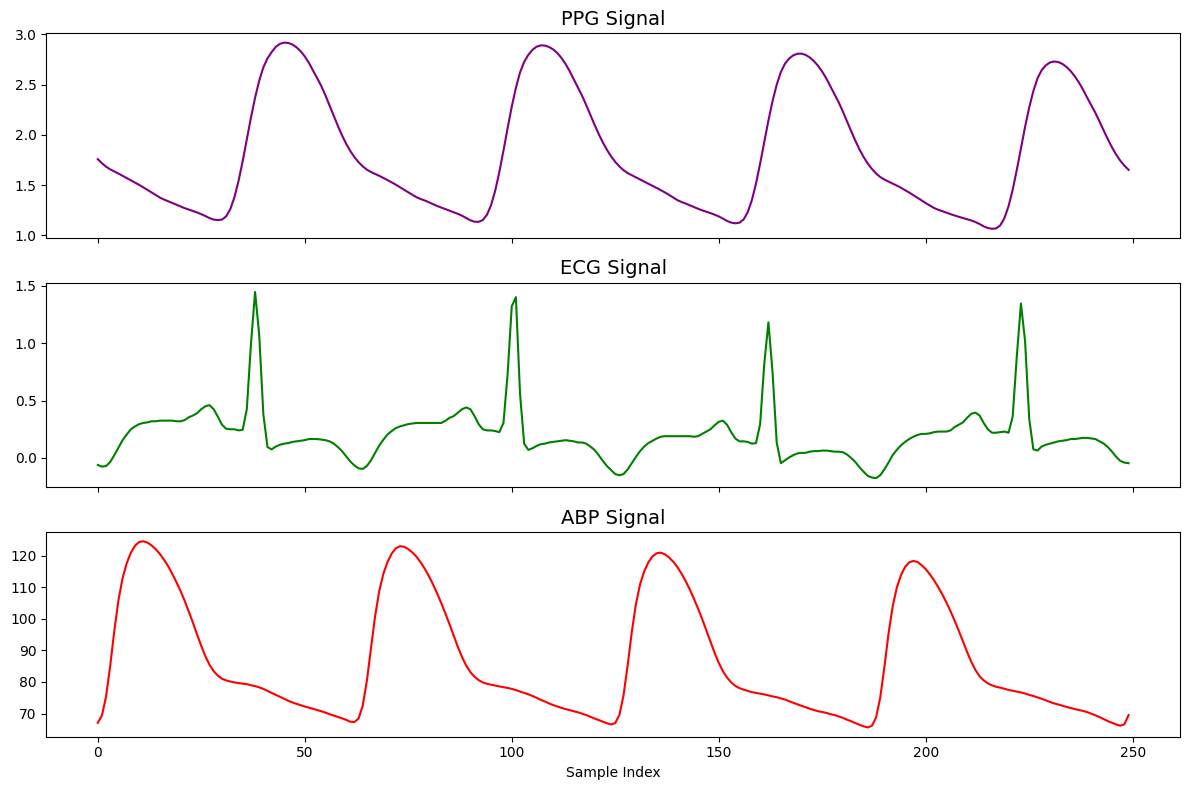

In [4]:
# Plot PPG, ECG, and ABP signals
idx = 0
fig, ax = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

ax[0].plot(ppg[idx], color='purple')
ax[0].set_title("PPG Signal", fontsize=14)

ax[1].plot(ecg[idx], color='green')
ax[1].set_title("ECG Signal", fontsize=14)

ax[2].plot(abp[idx], color='red')
ax[2].set_title("ABP Signal", fontsize=14)

plt.xlabel("Sample Index")
plt.tight_layout()
plt.show()


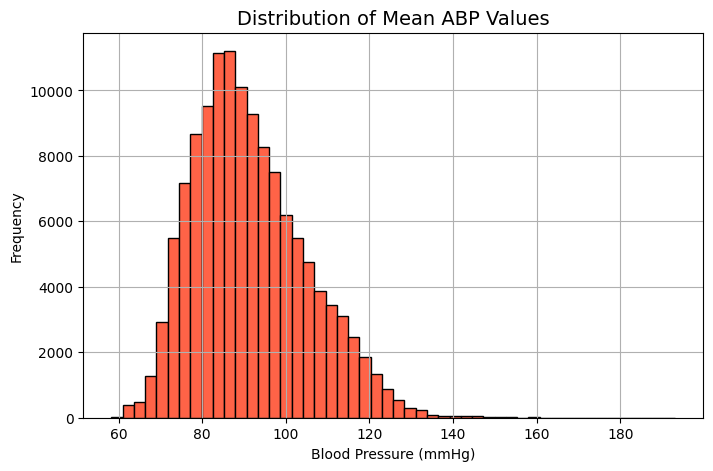

In [5]:
# Mean ABP values
abp_means = abp.mean(axis=1)

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(abp_means, bins=50, color='tomato', edgecolor='black')
plt.title("Distribution of Mean ABP Values", fontsize=14)
plt.xlabel("Blood Pressure (mmHg)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [6]:
X = np.stack((ppg, ecg), axis=-1)
y = abp.mean(axis=1).reshape(-1, 1)


In [7]:
# Flatten the features
X_flat = X.reshape(X.shape[0], -1)

# Scale the features and target variable
scaler_X = StandardScaler().fit(X_flat)
X_scaled = scaler_X.transform(X_flat).reshape(X.shape)

scaler_y = StandardScaler().fit(y)
y_scaled = scaler_y.transform(y)


In [8]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

In [10]:
def CNN_LSTM_Model_256(input_shape):
    model = Sequential([
        layers.Conv1D(filters=256, kernel_size=5, activation='relu', input_shape=input_shape, padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.2),

        layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.2),

        layers.LSTM(256, return_sequences=False),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),

        layers.Dense(1, activation='linear')
    ])
    return model

# Build and compile the model
model = CNN_LSTM_Model(input_shape=(sample_size, 2))
model.compile(optimizer=Adam(learning_rate=5e-4), loss='mse', metrics=['mae'])

# Model Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 250, 128)            │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 250, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 125, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 125, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 125, 64)             │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 125, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 62, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 62, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151,745 (592.75 KB)

 Trainable params: 150,721 (588.75 KB)

 Non-trainable params: 1,024 (4.00 KB)

In [11]:
# Fit the model to the training data
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=25,
    batch_size=64,
    verbose=1
)

Epoch 1/25


I0000 00:00:1747182235.242412     271 cuda_dnn.cc:529] Loaded cuDNN version 90300


1403/1403 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - loss: 1.1101 - mae: 0.8243 - val_loss: 0.5795 - val_mae: 0.5767
Epoch 2/25
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 0.6121 - mae: 0.6015 - val_loss: 0.5283 - val_mae: 0.5513
Epoch 3/25
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 0.4766 - mae: 0.5281 - val_loss: 0.4373 - val_mae: 0.5038
Epoch 4/25
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 0.4325 - mae: 0.4996 - val_loss: 0.3587 - val_mae: 0.4480
Epoch 5/25
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 0.3859 - mae: 0.4701 - val_loss: 0.3415 - val_mae: 0.4321
Epoch 6/25
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 0.3592 - mae: 0.4490 - val_loss: 0.2762 - val_mae: 0.3827
Epoch 7/25
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 0.3310 - mae: 0.4284 - val_loss: 0.2417 - val_mae: 0.3573
Epoch 8/25
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 0.2826 - mae: 0.3942 - val_loss: 0.2627 - val_mae: 0.3664
Epoch 9/25
1403/1403 ━━━━━━━━━━━━━━

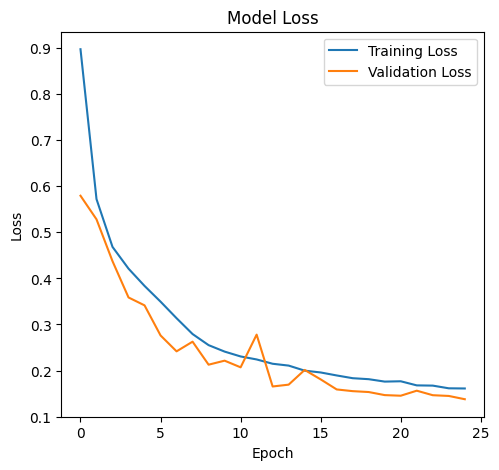

In [12]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

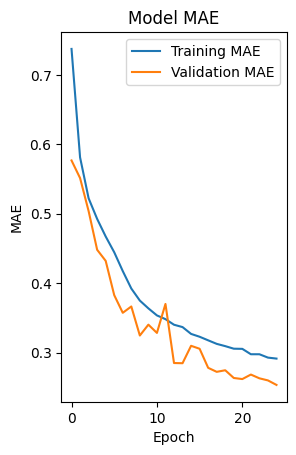

In [13]:
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Plot Loss and RMSE
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation Loss & MAE')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [17]:
preds = model.predict(X_test)

y_test_orig = scaler_y.inverse_transform(y_test)
preds_orig = scaler_y.inverse_transform(preds)

rmse = np.sqrt(mean_squared_error(y_test_orig, preds_orig))
r2 = r2_score(y_test_orig, preds_orig)
print(f"Test RMSE: {rmse:.2f} mmHg")
print(f"R-squared: {r2:.4f}")

1203/1203 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Test RMSE: 5.03 mmHg
R-squared: 0.8616


In [18]:
model.save('CNN_LSTM_Model_256.h5')

In [22]:
with open('/kaggle/working/scaler_X.pkl', 'wb') as f:
    pickle.dump(scaler_X, f)

with open('/kaggle/working/scaler_y.pkl', 'wb') as f:
    pickle.dump(scaler_y, f)